# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

If we were to use Palmer Penguins to predict bill_length_mm using the other variables, we would dummify bill_depth_mm because it is closely related to the bill length.

In [1]:
!pip install palmerpenguins

In [2]:
from palmerpenguins import load_penguins

penguins = load_penguins()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [3]:
bill_depth_mm = penguins['bill_depth_mm']
bill_length_mm = penguins['bill_length_mm']

penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

y = penguins['bill_depth_mm']
X = penguins['bill_length_mm'].values.reshape(-1, 1)

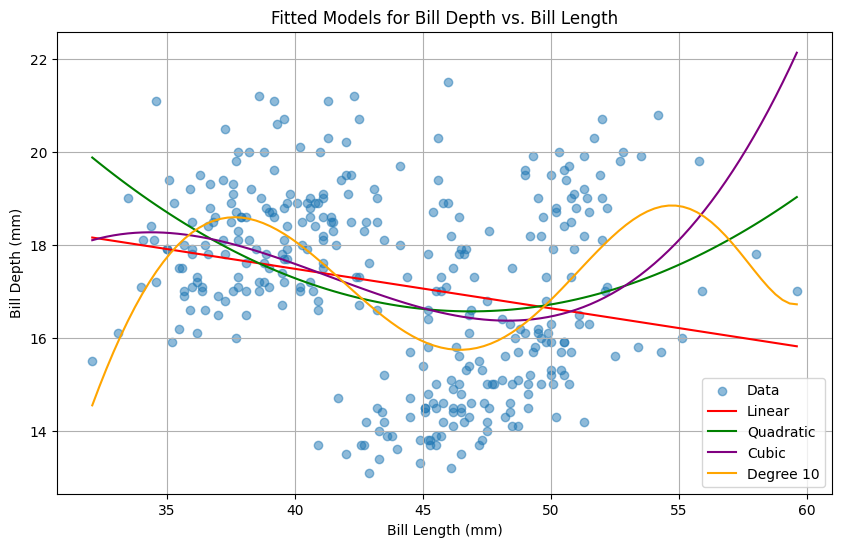

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(X, y)

quadratic_features = PolynomialFeatures(degree=2)
quadratic = make_pipeline(quadratic_features, LinearRegression())
quadratic.fit(X, y)

polynomial_features = PolynomialFeatures(degree=3)
cubic = make_pipeline(polynomial_features, LinearRegression())
cubic.fit(X, y)

polynomial_features_ten = PolynomialFeatures(degree=10)
degree_ten = make_pipeline(polynomial_features_ten, LinearRegression())
degree_ten.fit(X, y)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(x_range, linear_model.predict(x_range), label="Linear", color='red')
plt.plot(x_range, quadratic.predict(x_range), label="Quadratic", color='green')
plt.plot(x_range, cubic.predict(x_range), label="Cubic", color='purple')
plt.plot(x_range, degree_ten.predict(x_range), label="Degree 10", color='orange')


plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Fitted Models for Bill Depth vs. Bill Length')
plt.legend()
plt.grid(True)
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Model 1 is underfitting because it’s too simple, showing high training and test errors.
Model 4 is overfitting because it fits the training data very well but performs worse on the test set.
Model 2 or 3 fit best because they balance bias and variance, achieving the lowest test error.